# Average Domestic Hot Water (DHW) and electrical analysis per day per Rive De Gier

<div class="alert alert-success" role="alert">
    <strong>Summary:</strong><br> This notebook provides a guide to visualize the DHW and electrical consumption of an apartment in the city of Rive de Gier.
</div>

## Average DHW used per day by Rive de Gier

<div class="alert alert-info">
<strong>Details :</strong><br>
The first part of this notebook calculates the average DHW consumption for each apartment using the data spanning two years. It employs a one-hour resampling technique, computing the hourly mean of DWH values for each apartment. The resulting data is then visulized through plotting to observe variations and identify patterns.
</div>

The os module is employed to get the names of the entries by manipulating the path. To get more information, you have the option to refer to the library's documentation. Even though, this notebook will provide explanations for the functions used : https://docs.python.org/3/library/os.html  
The pandas module facilitates data analysis and the use of dataframes. You can find the library's documentation on this link: https://pandas.pydata.org/docs/  
The numpy module is instrumental in manipulating matrices and tables, serving for numerical calculations. You can find the library's documentation on this link: https://numpy.org/doc/stable/  
Lastly, the matplotlib.pyplot module is utilized for plotting values to visualize the data. You can find the library's documentation on this link: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get the data for DHW for the city of Rive De Gier

The required Domestic Hot Water (DHW) files end with "-IECS", this designation indicates data related to DHW. The os module is utilized to compile a list of DHW data for all apartments.

In [2]:
folder = r"../Data/DataGier/"
files = os.listdir(folder)
list_IECS = [file for file in files if '-IECS' in file]
list_IECS.sort()

Using the pandas module, we read the CSV files containing the listed information from the previous step. Then, we use the resample function within the pandas module to resample the data to a 10-min interval.

In [3]:
data = {} #Creation of a dictionary
for file in list_IECS:
    df = pd.read_csv(folder + file)
    ts = df.set_index('0')['Value']     # DataFrame -> TimeSeries
    ts.index = pd.to_datetime(ts.index, unit='s')   # index to secondes
    ts = ts.resample("10Min").mean()    # resample 10 min
    data[file[:-4]] = ts                # file name (but not .extension) 

We proceed to create a dataframe with the previously acquired data. 

In [4]:
df = pd.DataFrame(data)
df = df[~df.isnull().any(axis=1)]       # Remove the row with Nan Value

Using the function mean of the pandas module, we work out the average value across the apartments. Then, we convert the DHW data from l/s to l/h.

In [5]:
df['mean'] = df.mean(axis=1)   
df=df*3600

We aim to observe our data from an hourly perspective, to achieve this, we use the resample funtion to resample the data to one-hour interval.  
We then employ the groupby function of the pandas module to aggregate the average values for each apartment from 0 AM to 12 PM for every hour over the two-year span.  
We use the sum function from the numpy module to work out the total consumption for each apartment by summing the average values of each apartment.  
Next we aim to visualize our data by employing the plot function to generate histograms.

In [6]:
df1h = df.resample("H").mean() #Resample the data for one hour
df1h = df1h.groupby(df1h.index.time).mean() #Work out the mean values of every values for the different hours
av = np.sum(df1h, axis=0) #Sum all the mean values of one apartment

Next we aim to visualize our data by employing the plot function to generate histograms.

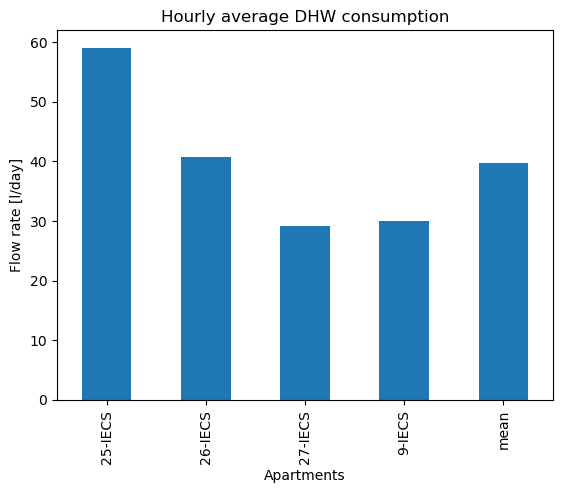

In [7]:
#Plot the histogram of the values
ax = av.plot(kind='bar', xlabel='Apartments', ylabel='Flow rate [l/day]')
ax.set_title('Hourly average DHW consumption')
plt.show()

We can explore the data through the lens of a linear model using the plot function.

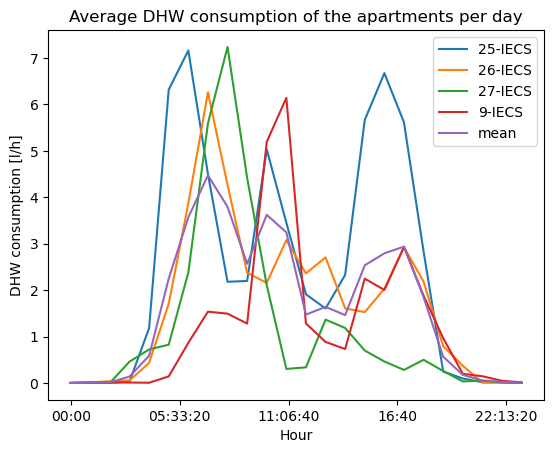

In [8]:
ac=df1h.plot(xlabel='Hour', ylabel='DHW consumption [l/h]')
ac.set_title('Average DHW consumption of the apartments per day')
plt.show()

## Average electrical consumption of the apartments of the city of Rive de Gier

<div class="alert alert-info">
<strong>Details :</strong><br>
The second part of the notebook calculates the average electrical consumption for each apartment using the data spanning two years. It employs a one-hour resampling technique, computing the hourly mean of electrical values for each apartment. The resulting data is then visulized through plotting to observe variations.
</div>

## Get the data from files for electrical consumption for the city of Rive de Gier

The required electrical files end with "-EC", this designation indicates data related to electrical consumption linked to the domestic hot water used.  
The os module is utilized to compile a list of electrical data for all apartments.

In [9]:
list_EC = [file for file in files if '-EC' in file]
list_EC.sort()

Using the pandas module, we read the CSV files containing the listed information from the previous step.  
Then, we use the resample function within the pandas module to resample the data to a 10-min interval.

In [10]:
dataBis = {} #Creation of a dictionary
for file in list_EC:
    df = pd.read_csv(folder + file)
    ts = df.set_index('0')['Value']     # DataFrame -> TimeSeries
    ts.index = pd.to_datetime(ts.index, unit='s')   # index to secondes
    ts = ts.resample("10Min").mean()    # resample 10 min
    dataBis[file[:-4]] = ts                # file name (but not .extension)

We proceed to create a dataframe with the previously acquired data. 

In [11]:
df1 = pd.DataFrame(dataBis)
df1 = df1[~df1.isnull().any(axis=1)]       # Remove the row with Nan Value

Using the function mean of the pandas module, we work out the average value across the apartments.  
We aim to observe our data from an hourly perspective, to achieve this, we use the resample funtion to resample the data to one-hour interval.  
We then employ the groupby function of the pandas module to aggregate the average values for each apartment from 0 AM to 12 PM for every hour over the two-year span.  
We use the sum function from the numpy module to work out the total consumption for each apartment by summing the average values of each apartment.  
Next we aim to visualize our data by employing the plot function to generate histograms.

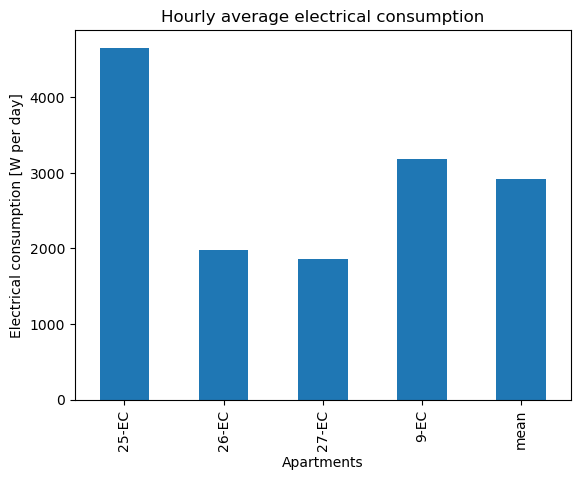

In [12]:
df1['mean'] = df1.mean(axis=1)
df2h = df1.resample("H").mean() #Resample the data for one hour
df2h = df2h.groupby(df2h.index.time).mean() #Work out the mean values of every values for the different hours
av1 = np.sum(df2h, axis=0) #Sum all the mean values of one apartment

#Plot the histogram diagram
ax1= av1.plot(kind='bar', xlabel='Apartments', ylabel='Electrical consumption [W per day]')
ax1.set_title('Hourly average electrical consumption')
plt.show()

We can explore the data through the lens of a linear model using the plot function.

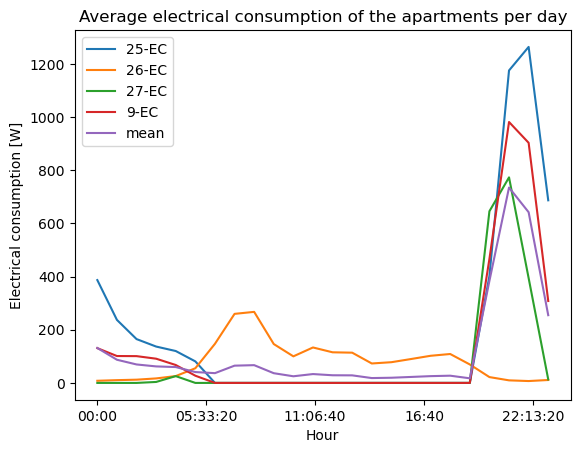

In [13]:
ac1=df2h.plot(xlabel='Hour', ylabel='Electrical consumption [W]')
ac1.set_title('Average electrical consumption of the apartments per day')
plt.show()